In [1]:
import numpy as np, matplotlib.pyplot as plt, os

In [2]:
import scipy.io as sio

In [3]:
cwd = os.getcwd()

In [4]:
Pavia_scene_dir = os.path.join(cwd, "MAT Files", "Pavia.mat")

In [5]:
PaviaSc_gt_dir = os.path.join(cwd, "GT Files", "Pavia_gt.mat")

In [6]:
print(Pavia_scene_dir)

/Users/suhasmathey/Hyper_Spectral Imaging/Hyper-Spectral-Image-Analysis/MAT Files/Pavia.mat


In [7]:
PaviaSc_data_mat = sio.loadmat(Pavia_scene_dir)

In [8]:
PaviaSc_gt_mat = sio.loadmat(PaviaSc_gt_dir)


## Pavia - Ground Truth Data

In [9]:
PaviaSc_gt_mat['pavia_gt'].astype(np.float64)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Pavia Data Matrix

In [10]:
PaviaSc_data_mat['pavia'].astype(np.float64)

array([[[ 854.,  601.,  350., ..., 3664., 3636., 3643.],
        [ 527.,  642.,  575., ..., 3834., 3725., 3768.],
        [ 374.,  322.,  179., ..., 4318., 4311., 4321.],
        ...,
        [ 367.,  432.,  461., ..., 2582., 2504., 2512.],
        [ 261.,  311.,  366., ..., 2269., 2174., 2163.],
        [1059.,  678.,  403., ..., 2245., 2135., 2136.]],

       [[1060.,  909.,  596., ..., 2963., 2967., 2974.],
        [ 707.,  757.,  646., ..., 3508., 3534., 3648.],
        [ 143.,  419.,  417., ..., 4650., 4612., 4638.],
        ...,
        [ 465.,  547.,  537., ..., 3156., 3052., 3035.],
        [ 884.,  615.,  401., ..., 2792., 2667., 2639.],
        [ 756.,  401.,  213., ..., 2600., 2484., 2445.]],

       [[ 532.,  545.,  594., ..., 1675., 1653., 1680.],
        [ 523.,  491.,  321., ..., 3339., 3349., 3403.],
        [ 816.,  681.,  369., ..., 4627., 4600., 4650.],
        ...,
        [ 408.,  539.,  436., ..., 3099., 3005., 3006.],
        [ 393.,  447.,  476., ..., 3172., 304

In [11]:
data = PaviaSc_data_mat['pavia']

In [12]:
gt_data = PaviaSc_gt_mat['pavia_gt']

In [13]:
indices = np.where(gt_data == 0)

In [14]:
bg_indices = list(zip(indices[0], indices[1]))

**Create a mask to remove the background pixels**

In [15]:
mask = gt_data != 0 

In [16]:
masked_data = data[mask, :].T

In [54]:
data.shape

(1096, 715, 102)

In [53]:
masked_data.shape

(102, 148152)

In [18]:
n_classes = np.max(gt_data) + 1

In [19]:
cmap = plt.get_cmap("viridis", n_classes)

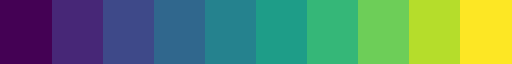

In [20]:
cmap

In [21]:
norm = plt.Normalize(vmin=0, vmax=n_classes)

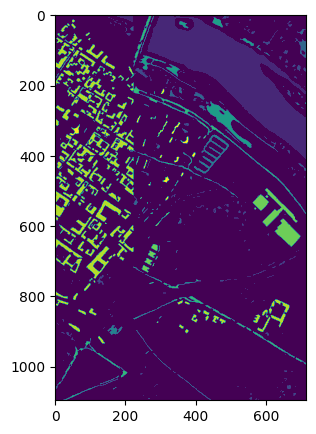

In [22]:
plt.figure(figsize=(5, 5))
plt.imshow(gt_data, cmap=cmap)
plt.show()

In [23]:
data.shape[0]

1096

In [24]:
data_mat = data.reshape(-1, data.shape[2]).T

In [25]:
data_mat.shape

(102, 783640)

In [26]:
gt_vec = gt_data.flatten()

In [27]:
np.sort(np.unique(gt_vec))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [28]:
indices = np.where(gt_vec == 1)[0]

In [29]:
len(indices)

65971

In [30]:
indices[1]

162

In [31]:
rand_idx1 = np.random.choice(indices, 300, False)

In [32]:
len(rand_idx1)

300

In [33]:
rand_idx1

array([ 69847,  94159,   5321, 184373, 271695, 118465, 245185, 158592,
       249489,  95454,   6077, 171518, 155690,  99834, 218007,  48346,
        45435, 159252,  71916, 114323, 134175, 177885, 200759,   8061,
        97036, 109797, 242324,  44634, 129303, 144397, 119918,  75417,
       180080,  96201,  66050, 104187, 139912,  43984,  78933, 122851,
        46860,  89757, 124870,  99944,  42498, 170034, 163551,  70389,
       116323,  96921, 108350,  97068, 140619, 208052, 173633, 208742,
        31851,  46750,  65557, 165094, 127761,   2341, 241646, 109190,
        89022, 202984,   6058,  83497, 104797, 140610, 156462,  30340,
        70417, 243031,  69901,  87072, 242329, 107656, 192982, 263102,
        77550,  29743, 205188,  82598, 177142, 254524, 258064, 204380,
       253821, 103372, 107148,  94043,   3037, 210904, 291712, 127929,
        77755, 197293,  45415,  76171, 239502,  15414, 114850, 180712,
       238036, 141442, 105637, 116329,  58411,  29702, 152995,  67032,
      

In [34]:
selec_data = data_mat[:, rand_idx1]

In [35]:
selec_data.shape

(102, 300)

In [36]:
mean_vector = np.mean(selec_data, axis=1)

In [37]:
mean_vector.shape

(102,)

## Mean Classifier

In [38]:
class MeanClassifier:
    def __init__(self, mean_vectors):

        """
        Parameters:
            mean_vectors: List containing the mean vector for each valid label.
        """
        
        self.mean_vectors = mean_vectors

In [39]:
def fit_mean(data, gt_data):

    """
    Parameters:
        data: A 3D array of shape (height, width, bands) representing the data cube
        gt_data: A 2D array of shape (height, width) representing the ground truth labels, 0 reperesenting the background

    Returns:
        MeanClassifier: An instance of MeanClassifier with computed mean vectors
    """

    data_mat = data.reshape(-1, data.shape[2]).T
    gt_vec = gt_data.flatten()
    gt_labels = np.sort(np.unique(gt_vec))
    valid_labels = gt_labels[gt_labels != 0]

    mean_vectors = []
    for label in valid_labels:
        indices = np.where(gt_vec == label)[0]

        idx_size = min(3000, len(indices))

        selected_indices = np.random.choice(indices, idx_size, False)
        selected_points = data_mat[:, selected_indices]

        mean_vector = np.mean(selected_points, axis=1)
        mean_vectors.append(mean_vector)

    return MeanClassifier(mean_vectors)

In [40]:
mean_classifier = fit_mean(data, gt_data)

In [41]:
mean_classifier.mean_vectors[1]

array([ 537.208     ,  450.81866667,  362.19933333,  314.48933333,
        295.43566667,  292.76466667,  295.13966667,  291.36633333,
        284.709     ,  277.92866667,  270.65866667,  259.028     ,
        250.92      ,  245.33633333,  239.777     ,  232.37      ,
        232.496     ,  236.47666667,  242.35233333,  252.18566667,
        267.04433333,  290.445     ,  317.457     ,  347.724     ,
        384.251     ,  421.273     ,  446.51833333,  462.67033333,
        473.18433333,  484.28666667,  495.00833333,  497.317     ,
        490.12766667,  478.493     ,  461.433     ,  439.55133333,
        416.289     ,  396.47233333,  381.60766667,  371.31466667,
        362.17433333,  353.797     ,  348.34266667,  344.018     ,
        339.55066667,  332.85633333,  323.29766667,  313.737     ,
        308.645     ,  304.52166667,  303.20933333,  301.67866667,
        297.14666667,  290.25166667,  279.67066667,  268.954     ,
        260.27533333,  250.95166667,  240.863     ,  231.664  

In [72]:
def classify(data, classifier):
    """
    Parameters:
        data: A 2D array of shape (bands, n_pixels), where each column is a pixel
        classifier: An object with attribute 'mean_vectors', a list of 1D numpy arrays
        
    Returns:
        pixel_classes: A 1D array of length n_pixels containing predicted pixel labels 
    """

    Dnorms = np.sum(np.square(data), axis=0)
    resids = []
    for Uc in classifier.mean_vectors:
        innerprod = np.dot(data.T, Uc)
        Uc_norm = np.sum(np.square(Uc), axis=0)

        distances = np.sqrt(np.abs(Dnorms - 2 * innerprod + Uc_norm))
        resids.append(distances)


    resids = np.array(resids)
    pixel_classes = np.argmin(resids, axis=0) + 1

    return pixel_classes

In [73]:
mean_class_labels = classify(masked_data, mean_classifier)

In [74]:
np.unique(mean_class_labels)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [75]:
mean_class_labels.shape

(148152,)

In [76]:
clustermap = np.zeros(data.shape[:2])

In [77]:
clustermap[mask] = mean_class_labels

In [78]:
np.unique(clustermap)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])